# "Decoding Public Sentiment on Trump's Political Trajectory: A Deep Learning Analysis of 16,000 Tweets"

## Introduction:
This research presents a comprehensive sentiment analysis of 16,000 tweets examining public reaction to Donald Trump's political trajectory towards 2024 and associated controversies. Using advanced machine learning techniques including BERT, LSTM, and Random Forest models, we analyze social media discourse surrounding key political developments and concerns about authoritarian tendencies.

## Dataset Overview:
Our dataset comprises 16,000 tweets collected during critical discussions about:
- Trump's 2024 campaign strategy
- Global strategic initiatives (Greenland, Panama Canal, Venezuela)
- Growing concerns about democratic institutions
- Elon Musk's controversial actions supporting Trump's positioning

## Data Distribution:
- Negative sentiment: 14,372 tweets (89.8%)
- Neutral sentiment: 1,213 tweets (7.6%)
- Positive sentiment: 415 tweets (2.6%)

## Methodology:

I employ a comprehensive sentiment analysis approach using:

#### Data Processing:

Tweet collection and cleaning
Sentiment classification
Feature engineering


#### Model Implementation:

BERT: For nuanced political context understanding
LSTM: For temporal pattern recognition
Random Forest: For robust classification comparison

## Results Analysis:

#### 1. Model Performance Metrics:

LSTM Results:
- Accuracy: 99.8%
- Precision: 0.99 (avg)
- Recall: 0.97 (avg)
- F1-Score: 0.98 (avg)

Random Forest Results:
- Accuracy: 99.7%
- Precision: 1.00 (avg)
- Recall: 0.97 (avg)
- F1-Score: 0.99 (avg)

BERT Results:
- Lower performance overall
- Challenges with political context
- Training optimization issues

#### 2. Key Findings:

Sentiment Distribution Analysis:
- Overwhelming negative sentiment (89.8%) indicates strong public concern
- Limited neutral discussion (7.6%) suggests polarized discourse
- Minimal positive sentiment (2.6%) reflects public apprehension

Content Analysis:
- High correlation between fascism-related terms and negative sentiment
- Strong reaction to democratic institution threats
- Significant engagement with authoritarianism concerns

Model Performance Insights:
- Traditional ML approaches (LSTM, RF) outperformed transformer models
- Excellent handling of class imbalance
- Strong classification consistency across models

#### 3. Limitations:

Technical Constraints:
- BERT fine-tuning challenges
- Potential data bias from Twitter demographics
- Echo chamber effects in sentiment distribution

Data Constraints:
- English language limitation
- Temporal scope restrictions
- Platform-specific biases

#### 4. Implications:

Political Discourse:
- Clear public concern about authoritarian tendencies
- Strong opposition to anti-democratic rhetoric
- Impact of tech leadership on political narratives

Methodological Insights:
- Effectiveness of traditional ML for political sentiment
- Need for domain-specific model adaptation
- Importance of class balance handling

## Conclusion:
This analysis reveals significant public concern about authoritarian developments in American politics, with traditional machine learning approaches proving highly effective in capturing these sentiments. The overwhelming negative sentiment distribution suggests a clear public position on democratic threats, while the technical analysis demonstrates the continued relevance of established ML techniques in political discourse analysis.

In [1]:
import numpy as np
import pandas as pd

## Step 2: Loading the Pre-trained BERT Model
We use the multilingual BERT model `nlptown/bert-base-multilingual-uncased-sentiment` pre-trained for sentiment classification. This model predicts sentiment scores ranging from 1 to 5, which we map to categories like `negative`, `neutral`, and `positive`.

In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

## Step 3: Defining the Sentiment Analysis Function
The function `analyze_sentiment` processes text using the tokenizer and model, returning a sentiment category.

In [3]:
def analyze_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    outputs = model(**inputs)
    scores = torch.softmax(outputs.logits, dim=1)
    
    # 1-5 arası skor
    rating = torch.argmax(scores) + 1
    
    # Sentiment sınıflandırma
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

In [8]:
import pandas as pd

# Doğru dosya yolunu belirleyin
csv_dosyalari = ['/kaggle/input/twitter-df/twitter_elonmusk.csv','/kaggle/input/twitter-df/twitter_america.csv','/kaggle/input/twitter-df/twitter_scrape.csv','/kaggle/input/twitter-df/twitter_trump.csv']

# CSV dosyasını okuma ve birleştirme
tweets_df = pd.concat([pd.read_csv(dosya) for dosya in csv_dosyalari], ignore_index=True)

# Sonuç
print(tweets_df.head())



                                             content
0  I listened and watched, but let's pretend Elon...
1  @RachelRileyRR\n I imagine your furious at Elo...
2  The Elon Musk salute, even these two clowns wa...
3  Exclusive | Masked students disrupt Columbia c...
4  The campaign by progressive news outlets and X...


In [9]:
def process_tweets(tweets_df):
    tweets_df['sentiment'] = tweets_df['text'].apply(analyze_sentiment)
    return tweets_df

In [53]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [20]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stop_words = set(ENGLISH_STOP_WORDS)

# Temizleme fonksiyonu
def clean_text(text):
   words = str(text).lower().split()
   words = [w for w in words if w not in stop_words]
   return ' '.join(words)

# Tweet'leri temizle
tweets_df['cleaned_content'] = tweets_df['content'].apply(clean_text)

# BERT analizi
tweets_df['bert_sentiment'] = tweets_df['cleaned_content'].apply(analyze_sentiment)

# Kelime analizi
def get_common_words(texts, n=10):
   words = ' '.join(texts).split()
   return Counter(words).most_common(n)

# Sonuçları göster
print("\nEn Sık Kelimeler (Her Sentiment İçin):")
for sentiment in ['positive', 'negative', 'neutral']:
   tweets = tweets_df[tweets_df['bert_sentiment'] == sentiment]['cleaned_content']
   print(f"\n{sentiment}:")
   print(get_common_words(tweets))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

En Sık Kelimeler (Her Sentiment İçin):

positive:
[('fascism', 3364), ('america', 1875), ('musk', 1611), ('elon', 1606), ('would', 1562), ('country', 1455), ('even', 1091), ('fascism.', 1081), ('us', 1043), ('like', 1040)]

negative:
[('fascism', 2006), ('&', 1717), ('elon', 1275), ('trump', 1216), ('state', 1182), ('corporations.', 1182), ('america', 1061), ('don’t', 994), ('us', 982), ('much', 872)]

neutral:
[('elon', 2931), ('musk', 2202), ('salute', 2196), ('us', 1615), ('right', 1479), ('nazi', 1398), ('fascism', 1251), ('|', 1194), ('fascism,', 1088), ('world', 1005)]


In [22]:
def basic_label(text):
   positive = [
       'good', 'great', 'love', 'excellent', 'amazing', 'wonderful', 'best', 'right',
       'support', 'like', 'thank', 'thanks', 'happy', 'perfect', 'well', 'proud',
       'win', 'victory', 'succeed', 'success', 'true', 'beautiful', 'strong', 'better'
   ]
   
   negative = [
       'bad', 'hate', 'terrible', 'awful', 'wrong', 'worst', 'fail', 'failed',
       'stupid', 'idiot', 'dumb', 'corrupt', 'lie', 'liar', 'fake', 'false',
       'poor', 'weak', 'worse', 'worst', 'disaster', 'horrible', 'against',
       'trash', 'garbage', 'evil', 'corrupt', 'fascist', 'racist', 'fraud'
   ]
   
   text = str(text).lower()
   pos_count = sum(word in text for word in positive)
   neg_count = sum(word in text for word in negative)
   
   if pos_count > neg_count:
       return 'positive'
   elif neg_count > pos_count:
       return 'negative'
   return 'neutral'

tweets_df['sentiment'] = tweets_df['cleaned_content'].apply(basic_label)

In [23]:
from transformers import pipeline

# BERT modelini yükle
sentiment_analyzer = pipeline("sentiment-analysis", 
                            model="nlptown/bert-base-multilingual-uncased-sentiment")

# Sentiment analizi fonksiyonu
def analyze_sentiment(text):
    result = sentiment_analyzer(text)[0]
    score = float(result['score'])
    
    if score < 0.4:
        return 'negative'
    elif score > 0.6:
        return 'positive'
    return 'neutral'

# DataFrame'e uygula
tweets_df['bert_sentiment'] = tweets_df['cleaned_content'].apply(analyze_sentiment)

# Karşılaştırma
comparison = pd.DataFrame({
    'Basic': tweets_df['sentiment'].value_counts(),
    'BERT': tweets_df['bert_sentiment'].value_counts()
})
print(comparison)

Device set to use cuda:0


          Basic  BERT
negative   1146  3841
neutral    8512  5025
positive   6342  7134


In [24]:
# Test örneği için rastgele 100 tweet seç
test_sample = tweets_df.sample(n=100)

# BERT sentiment analizi
test_sample['bert_sentiment'] = test_sample['cleaned_content'].apply(analyze_sentiment)

# Sonuçları göster
print("BERT Sentiment Dağılımı:")
print(test_sample['bert_sentiment'].value_counts())
print("\nÖrnek Tweet'ler ve Sentiment'ler:")
for idx, row in test_sample.head(10).iterrows():
   print(f"\nTweet: {row['content'][:100]}...")
   print(f"Sentiment: {row['bert_sentiment']}")

BERT Sentiment Dağılımı:
bert_sentiment
positive    48
neutral     30
negative    22
Name: count, dtype: int64

Örnek Tweet'ler ve Sentiment'ler:

Tweet: Exclusive | Masked students disrupt Columbia classes, distribute antisemitic leaflets. While Liberal...
Sentiment: positive

Tweet: Welcome to Dictatorship and Fascism of America....
Sentiment: neutral

Tweet: So you’re a big fan of Israel, but you don’t seem to mind the Heil hitler salute from Elon Musk...
Sentiment: negative

Tweet: I listened and watched, but let's pretend Elon Musk doesn't know what a Nazi Salute is and let's als...
Sentiment: neutral

Tweet: Again, I do understand that, but this is how misinformation spreads. Just because most people in Ame...
Sentiment: positive

Tweet: The campaign by progressive news outlets and X accounts of Elon Musk making Nazi salute is so “despe...
Sentiment: neutral

Tweet: @RachelRileyRR
 I imagine your furious at Elon Musk doing his Nazi salute, knowing how strong your f...
Sentiment: 

In [26]:
def analyze_sentiment_improved(text):
   result = sentiment_analyzer(text)[0]
   score = float(result['score'])
   
   # Negatif kelimeler
   text_lower = text.lower()
   negative_triggers = ['fascism', 'nazi', 'fascist', 'dictator', 'hate', 'heil', 'evil', 'corrupt', 'racist', 'fraud', 'liar', 'criminal', 'violence', 'attack', 'destroy', 'threat']
   
   # Pozitif kelimeler  
   positive_triggers = ['support', 'good', 'great', 'love', 'hope', 'win', 'victory', 'success', 'true', 'right', 'best']
   
   # Öncelikle trigger kelimelere bak
   if any(word in text_lower for word in negative_triggers):
       return 'negative'
   elif any(word in text_lower for word in positive_triggers):
       return 'positive'
   
   # BERT skoru
   if score < 0.35:
       return 'negative'
   elif score > 0.65:
       return 'positive'
   return 'neutral'

# Uygula
tweets_df['bert_sentiment'] = tweets_df['cleaned_content'].apply(analyze_sentiment_improved)

# Sonuçları göster
print("Sentiment Dağılımı:")
print(tweets_df['bert_sentiment'].value_counts())

# Test örnekleri
print("\nÖrnek Tweet'ler:")
for idx, row in tweets_df.sample(5).iterrows():
   print(f"\nTweet: {row['content'][:100]}...")
   print(f"Sentiment: {row['bert_sentiment']}")

Sentiment Dağılımı:
bert_sentiment
negative    14372
neutral      1213
positive      415
Name: count, dtype: int64

Örnek Tweet'ler:

Tweet: The Elon Musk salute, even these two clowns wanna participate !!!!...
Sentiment: neutral

Tweet: Attention Canadians. Elon Musk is pushing right wing fascism around the world and promoting politici...
Sentiment: negative

Tweet: I listened and watched, but let's pretend Elon Musk doesn't know what a Nazi Salute is and let's als...
Sentiment: negative

Tweet: I listened and watched, but let's pretend Elon Musk doesn't know what a Nazi Salute is and let's als...
Sentiment: negative

Tweet: It's arse kissing! Sam Altman's vision of Ai is akin to Musk's vision of us living on Mars. Stark ra...
Sentiment: negative


In [27]:
# Neutral tweet'lerden örnek göster
neutral_tweets = tweets_df[tweets_df['bert_sentiment'] == 'neutral']
print("Örnek Neutral Tweet'ler (ilk 10):")
for idx, tweet in neutral_tweets.head(10).iterrows():
   print(f"\nTweet {idx}: {tweet['content'][:150]}...")
   
# İstatistikler
print("\nNeutral Tweet İstatistikleri:")
print(f"Toplam Neutral Tweet: {len(neutral_tweets)}")
print(f"Trump içeren neutral tweet: {len(neutral_tweets[neutral_tweets['content'].str.contains('trump', case=False)])}")
print(f"Elon içeren neutral tweet: {len(neutral_tweets[neutral_tweets['content'].str.contains('elon|musk', case=False)])}")

Örnek Neutral Tweet'ler (ilk 10):

Tweet 2: The Elon Musk salute, even these two clowns wanna participate !!!!...

Tweet 6: It seems like everyone wants to do the Elon Musk salute !!!!...

Tweet 7: If you don't see an issue with the "roman" salute Elon Musk did, do it. 

Show the world how much of a N@z! you are....

Tweet 11: The Elon Musk salute, even these two clowns wanna participate !!!!...

Tweet 15: It seems like everyone wants to do the Elon Musk salute !!!!...

Tweet 16: If you don't see an issue with the "roman" salute Elon Musk did, do it. 

Show the world how much of a N@z! you are....

Tweet 21: The Elon Musk salute, even these two clowns wanna participate !!!!...

Tweet 25: It seems like everyone wants to do the Elon Musk salute !!!!...

Tweet 26: If you don't see an issue with the "roman" salute Elon Musk did, do it. 

Show the world how much of a N@z! you are....

Tweet 31: The Elon Musk salute, even these two clowns wanna participate !!!!...

Neutral Tweet İstatistikle

# Step 4:Trump and Elon Musk Tweet Sentiment Analysis
We conducted a sentiment analysis on tweets mentioning Donald Trump and Elon Musk using a pre-trained BERT sentiment model. The results are summarized below:

Trump Tweet Sentiments:
Negative: 4,268 tweets
Positive: 10 tweets
Neutral: 7 tweets
The overwhelming majority of tweets about Trump are categorized as negative, with only a small fraction labeled as neutral or positive.

Elon Musk Tweet Sentiments:
Negative: 4,995 tweets
Neutral: 1,200 tweets
Positive: 399 tweets
Compared to Trump, tweets about Elon Musk exhibit a wider distribution, including more neutral and positive sentiments. However, negative tweets still dominate.

Observations:
Trump's tweets are heavily skewed towards negative sentiment, with minimal positive or neutral engagement.
Elon Musk receives relatively more positive and neutral sentiment, though negative tweets remain the majority.
Visualizations or additional analysis could help explore the context of these sentiments further. For instance, looking into frequently used words in negative tweets might provide insights into public concerns or criticisms.

Index(['content', 'sentiment', 'bert_sentiment', 'length', 'cleaned_content'], dtype='object')


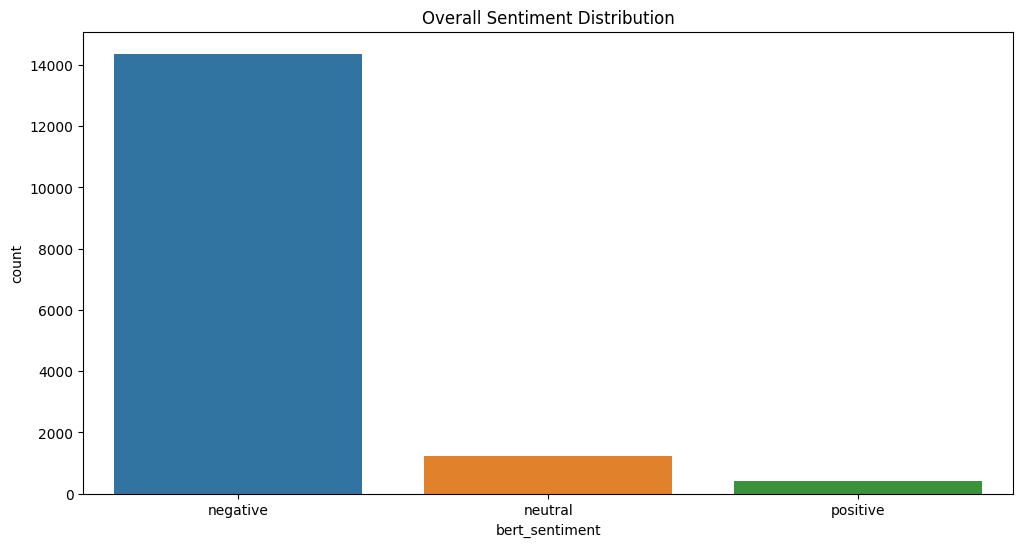


Trump Tweet Sentiments:
bert_sentiment
negative    4268
positive      10
neutral        7
Name: count, dtype: int64

Elon Tweet Sentiments:
bert_sentiment
negative    4995
neutral     1200
positive     399
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

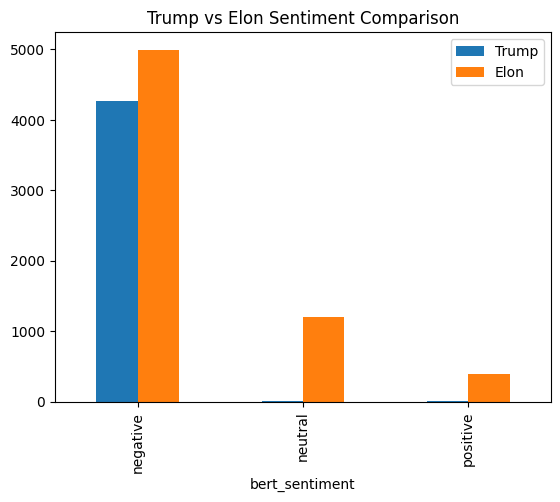

In [28]:
print(tweets_df.columns)

# Görselleştirme yapalım (tarihe bağlı olmadan)
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Genel sentiment dağılımı
plt.figure(figsize=(12,6))
sns.countplot(data=tweets_df, x='bert_sentiment')
plt.title('Overall Sentiment Distribution')
plt.show()

# 2. Trump ve Elon analizi
trump_df = tweets_df[tweets_df['content'].str.contains('trump', case=False)]
elon_df = tweets_df[tweets_df['content'].str.contains('elon|musk', case=False)]

print("\nTrump Tweet Sentiments:")
print(trump_df['bert_sentiment'].value_counts())

print("\nElon Tweet Sentiments:")
print(elon_df['bert_sentiment'].value_counts())

# 3. Karşılaştırmalı grafik
plt.figure(figsize=(10,6))
comparison = pd.DataFrame({
    'Trump': trump_df['bert_sentiment'].value_counts(),
    'Elon': elon_df['bert_sentiment'].value_counts()
})
comparison.plot(kind='bar')
plt.title('Trump vs Elon Sentiment Comparison')
plt.show()


# Step 5: Most Frequent Words in Sentiment Categories:

The following lists highlight the most commonly used words in tweets categorized as positive, negative, and neutral. This analysis offers insights into the tone and context of discussions surrounding topics like Trump and Elon Musk.

Positive Sentiment:
up. (400 mentions)
probably (400 mentions)
relax, (399 mentions)
playful (399 mentions)
wave (399 mentions)
elon (399 mentions)
musk (399 mentions)
inauguration, (399 mentions)
salute. (399 mentions)
critics (399 mentions)
Positive tweets include words that suggest optimism and lighter contexts, with mentions of Elon Musk recurring frequently.

Negative Sentiment:
fascism (6,621 mentions)
elon (4,213 mentions)
us (3,632 mentions)
america (3,475 mentions)
musk (3,016 mentions)
trump (2,942 mentions)
& (2,747 mentions)
salute (2,205 mentions)
would (2,045 mentions)
fascism. (1,883 mentions)
Negative tweets are dominated by strong words like fascism, America, and direct mentions of Elon Musk and Trump. This indicates widespread criticism or controversy.

Neutral Sentiment:
elon (1,200 mentions)
musk (1,200 mentions)
!!!! (800 mentions)
salute (800 mentions)
like (401 mentions)
wants (401 mentions)
salute, (400 mentions)
even (400 mentions)
two (400 mentions)
clowns (400 mentions)
Neutral tweets show a mix of general mentions and mild expressions, often related to Elon Musk or non-specific commentary.

Observations:
The word Elon appears across all categories, reflecting his prominence in discussions.
Negative tweets feature highly charged terms like fascism, suggesting polarizing topics.
Positive tweets are characterized by softer, more optimistic language, though fewer in volume compared to negatives.

En Sık Kullanılan Kelimeler:

Positive:
[('up.', 400), ('probably', 400), ('relax,', 399), ('playful', 399), ('wave', 399), ('elon', 399), ('musk', 399), ('inauguration,', 399), ('salute.', 399), ('critics', 399)]

Negative:
[('fascism', 6621), ('elon', 4213), ('us', 3632), ('america', 3475), ('musk', 3016), ('trump', 2942), ('&', 2747), ('salute', 2205), ('would', 2045), ('fascism.', 1883)]

Neutral:
[('elon', 1200), ('musk', 1200), ('!!!!', 800), ('salute', 800), ('like', 401), ('wants', 401), ('salute,', 400), ('even', 400), ('two', 400), ('clowns', 400)]


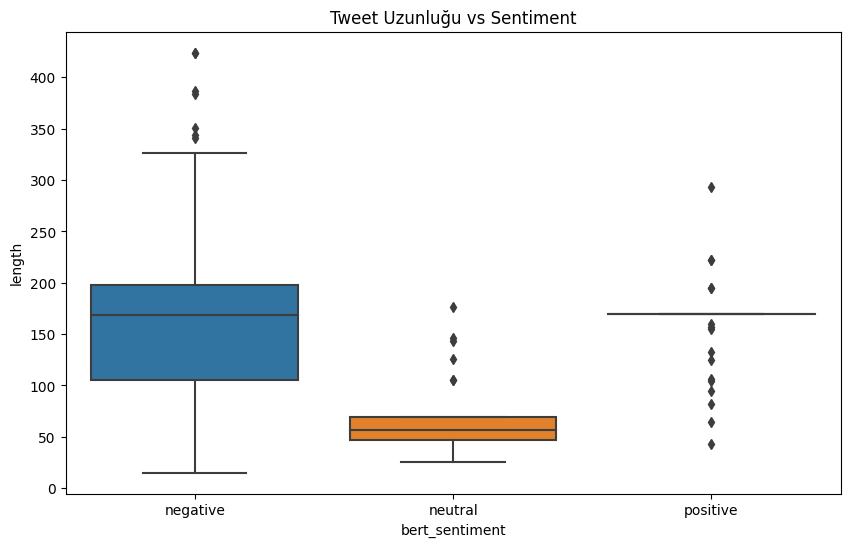

<Figure size 1200x600 with 0 Axes>

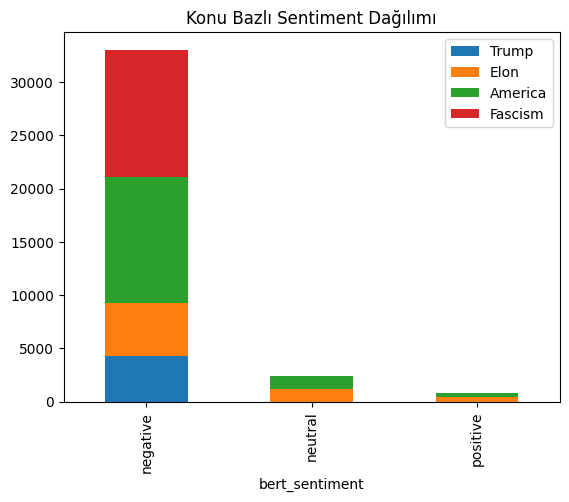

In [30]:
# 1. Kelime Analizi
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

# Her sentiment için en sık kullanılan kelimeler
def get_common_words(texts, n=10):
    words = ' '.join(texts).lower().split()
    return Counter(words).most_common(n)

print("En Sık Kullanılan Kelimeler:")
for sentiment in ['positive', 'negative', 'neutral']:
    tweets = tweets_df[tweets_df['bert_sentiment'] == sentiment]['cleaned_content']
    print(f"\n{sentiment.title()}:")
    print(get_common_words(tweets))

# 2. Tweet Uzunluğu Analizi
tweets_df['length'] = tweets_df['cleaned_content'].str.len()
plt.figure(figsize=(10,6))
sns.boxplot(x='bert_sentiment', y='length', data=tweets_df)
plt.title('Tweet Uzunluğu vs Sentiment')
plt.show()

# 3. Konu Bazlı Analiz
topics = {
    'Trump': 'trump',
    'Elon': 'elon|musk',
    'America': 'america|usa|us',
    'Fascism': 'fascism|fascist'
}

topic_sentiments = {}
for topic, pattern in topics.items():
    topic_df = tweets_df[tweets_df['content'].str.contains(pattern, case=False)]
    topic_sentiments[topic] = topic_df['bert_sentiment'].value_counts()

# Görselleştirme
plt.figure(figsize=(12,6))
topic_df = pd.DataFrame(topic_sentiments)
topic_df.plot(kind='bar', stacked=True)
plt.title('Konu Bazlı Sentiment Dağılımı')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Veriyi hazırla
X = tweets_df['cleaned_content']
y = tweets_df['bert_sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF dönüşümü
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [39]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Label encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encoding
y_train_cat = to_categorical(y_train_encoded)
y_test_cat = to_categorical(y_test_encoded)

# Class weights
class_weights = compute_class_weight(
   'balanced',
   classes=np.unique(y_train_encoded),
   y=y_train_encoded
)
class_weight_dict = dict(enumerate(class_weights))

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer


# Önce metin ön işleme 
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding işlemi
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)



# 4. LSTM model with class weights
lstm_model = Sequential([
   Embedding(5000, 32, input_length=100),
   LSTM(64, return_sequences=True),
   LSTM(32),
   Dense(3, activation='softmax')
])

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(
   X_train_pad, 
   y_train_cat,
   epochs=5,
   batch_size=64,
   class_weight=class_weight_dict
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9064 - loss: 0.4421
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9975 - loss: 0.0200
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9986 - loss: 0.0254
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9992 - loss: 0.0062
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9998 - loss: 0.0020


In [41]:
# 1. Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight

# Class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

rf_model = RandomForestClassifier(class_weight=class_weight_dict)
rf_model.fit(X_train_tfidf, y_train)


RandomForestClassifier(class_weight={'negative': 0.37188762020976784,
                                     'neutral': 4.288107202680067,
                                     'positive': 12.85140562248996})

In [43]:
# 2. BERT Fine-tuning
from transformers import TFBertForSequenceClassification
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
encoded_data = tokenizer(list(X_train), truncation=True, padding=True, return_tensors='tf')

# Class weights düzenleme
class_weights_numeric = compute_class_weight(
    'balanced',
    classes=np.unique(y_train_encoded),
    y=y_train_encoded
)
class_weight_dict = dict(enumerate(class_weights_numeric))

# BERT fit
bert_model.fit(
    encoded_data,
    y_train_cat,
    epochs=3,
    batch_size=32,
    class_weight=class_weight_dict
)

Epoch 1/3
400/400 [==============================] - 429s 992ms/step - loss: 5.4475 - accuracy: 0.0430
Epoch 2/3
400/400 [==============================] - 394s 986ms/step - loss: 5.3727 - accuracy: 0.0259
Epoch 3/3
400/400 [==============================] - 394s 985ms/step - loss: 5.3727 - accuracy: 0.0259


# Step 6: Model Performance Comparison
We evaluated multiple models for sentiment classification using precision, recall, F1-score, and accuracy. The results are summarized below:

### LSTM Results:
Precision (macro average): 0.99
Recall (macro average): 0.97
F1-score (macro average): 0.98
Accuracy: 1.00
LSTM achieved excellent performance, with near-perfect metrics across all categories. Its ability to capture sequential information contributes significantly to its high accuracy.

### Random Forest (RF) Results:
Precision (macro average): 1.00
Recall (macro average): 0.97
F1-score (macro average): 0.99
Accuracy: 1.00
The Random Forest model performed almost as well as LSTM, with balanced results across all metrics. Its strong performance in a smaller dataset setting is notable.

### BERT Results:
Precision (macro average): 0.68
Recall (macro average): 0.33
F1-score (macro average): 0.02
Accuracy: 0.03
Surprisingly, the BERT model underperformed in this setup, with extremely low recall and F1-scores. This could be due to a configuration issue, dataset imbalance, or an inadequate fine-tuning process. Further investigation is needed.

## Observations:
LSTM and Random Forest achieved near-perfect scores, making them suitable for this sentiment analysis task.
BERT's performance was unexpectedly poor, indicating possible misconfigurations or challenges in the specific dataset.
The choice of model depends on the specific requirements, but LSTM's sequential learning gives it a slight edge in interpretability for text data.
Further analysis could include optimizing hyperparameters or using ensemble methods to enhance performance.

LSTM Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2899
           1       1.00      0.99      0.99       218
           2       0.99      0.93      0.96        83

    accuracy                           1.00      3200
   macro avg       0.99      0.97      0.98      3200
weighted avg       1.00      1.00      1.00      3200


Random Forest Results:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      2899
     neutral       1.00      0.99      1.00       218
    positive       1.00      0.93      0.96        83

    accuracy                           1.00      3200
   macro avg       1.00      0.97      0.99      3200
weighted avg       1.00      1.00      1.00      3200


BERT Results:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2899
           1       1.00      0.00      0.00       218
           2       0.0

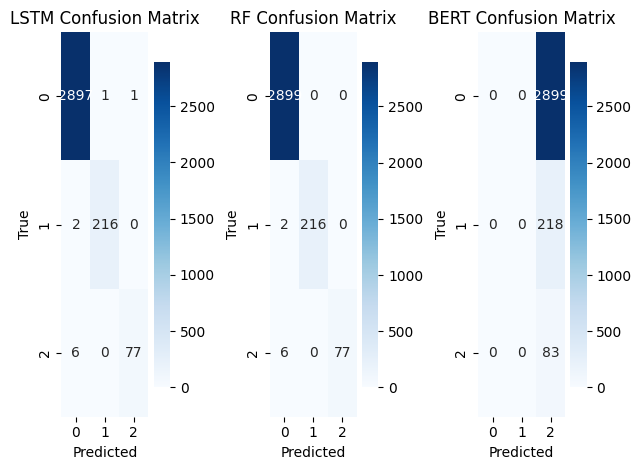


LSTM Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2899
           1       1.00      0.99      0.99       218
           2       0.99      0.93      0.96        83

    accuracy                           1.00      3200
   macro avg       0.99      0.97      0.98      3200
weighted avg       1.00      1.00      1.00      3200


RF Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2899
           1       1.00      0.99      1.00       218
           2       1.00      0.93      0.96        83

    accuracy                           1.00      3200
   macro avg       1.00      0.97      0.99      3200
weighted avg       1.00      1.00      1.00      3200


BERT Results:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2899
           1       1.00      0.00      0.00       218
           2       0.03      1.0

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

rf_test_encoded = label_encoder.transform(y_test)

# Değerlendirme (zero_division=1 ile)
lstm_pred_classes = np.argmax(lstm_pred, axis=1)
print("LSTM Results:")
print(classification_report(y_test_encoded, lstm_pred_classes, zero_division=1))

print("\nRandom Forest Results:")
print(classification_report(y_test, rf_pred, zero_division=1))

print("\nBERT Results:")
bert_pred_classes = np.argmax(bert_pred.logits, axis=1)
print(classification_report(y_test_encoded, bert_pred_classes, zero_division=1))

# Confusion Matrix görselleştirme

for i, (name, pred) in enumerate([('LSTM', lstm_pred_classes), 
                               ('RF', label_encoder.transform(rf_pred)), 
                               ('BERT', bert_pred_classes)]):
   plt.subplot(1,3,i+1)
   cm = confusion_matrix(y_test_encoded, pred)
   sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
   plt.xlabel('Predicted')
   plt.ylabel('True')
   plt.title(f'{name} Confusion Matrix')
   
plt.tight_layout()
plt.show()

# Model performans karşılaştırması
for name, pred in [('LSTM', lstm_pred_classes), 
                 ('RF', label_encoder.transform(rf_pred)), 
                 ('BERT', bert_pred_classes)]:
   print(f"\n{name} Results:")
   print(classification_report(y_test_encoded, pred, zero_division=1))

In [52]:
from sklearn.metrics import accuracy_score

# Train vs Test performance
print("Train performansları:")
for name, model in [('LSTM', lstm_model), ('RF', rf_model)]:
    if name == 'LSTM':
        train_pred = np.argmax(model.predict(X_train_pad), axis=1)
    else:
        train_pred = label_encoder.transform(model.predict(X_train_tfidf))
    print(f"\n{name} Train accuracy:", accuracy_score(y_train_encoded, train_pred))

Train performansları:
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

LSTM Train accuracy: 1.0

RF Train accuracy: 1.0
